# **Exploratory Data Analysis Lab**


## Objectives


In this lab we will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


Importing the pandas module.


In [1]:
import pandas as pd

Loading the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determining how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Ploting the distribution curve for the column `ConvertedComp`.


/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


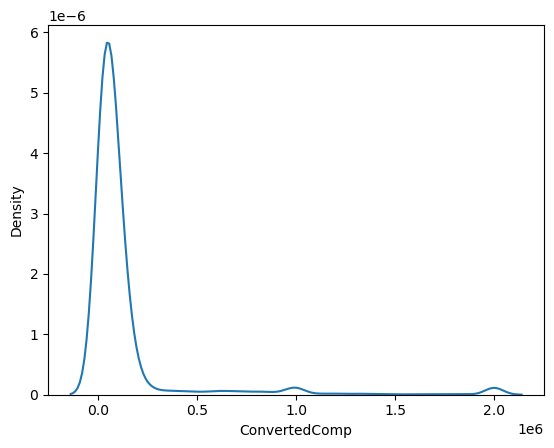

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.distplot(df['ConvertedComp'], 'ConvertedComp', hist = False, kde = True)
plt.show() 

Ploting the histogram for the column `ConvertedComp`.


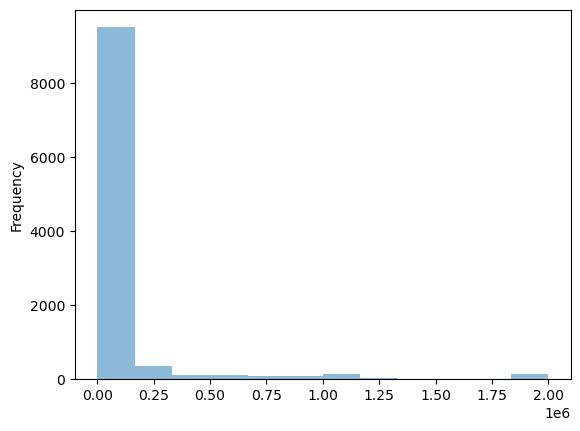

In [4]:
df['ConvertedComp'].plot.hist(bins=12, alpha=0.5)
plt.show()

median of the column `ConvertedComp`


In [5]:
df["ConvertedComp"].median()

57745.0

Number of responders identified themselves only as a **Man**


In [6]:
print((df['Gender'].eq('Man').sum()), 'respondents')

10480 respondents


The  median ConvertedComp of responders identified themselves only as a **Woman**


In [7]:
df[df['Gender'].eq('Woman')]['ConvertedComp'].median()

57708.0

Summary for the column `Age`


In [8]:
df['Age'].median()

29.0

In [9]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Ploting a histogram of the column `Age`.


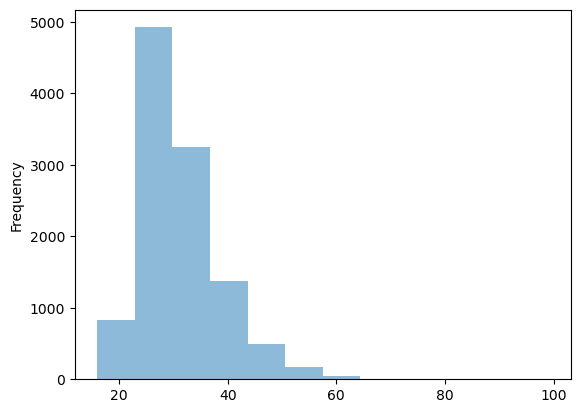

In [10]:
df['Age'].plot.hist(bins=12, alpha=0.5)
plt.show()

## Outliers


### Finding outliers


Finding out if outliers exist in the column `ConvertedComp` using a box plot


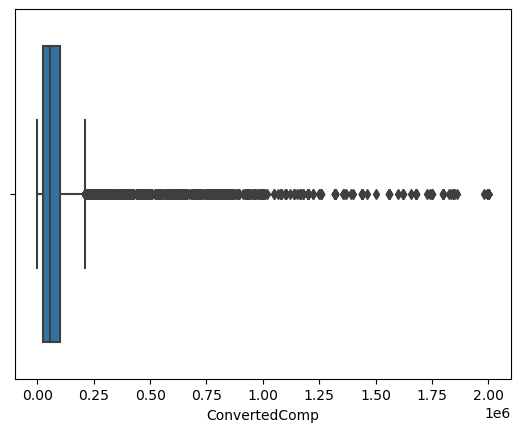

In [11]:
sns.boxplot(x=df["ConvertedComp"])
plt.show()

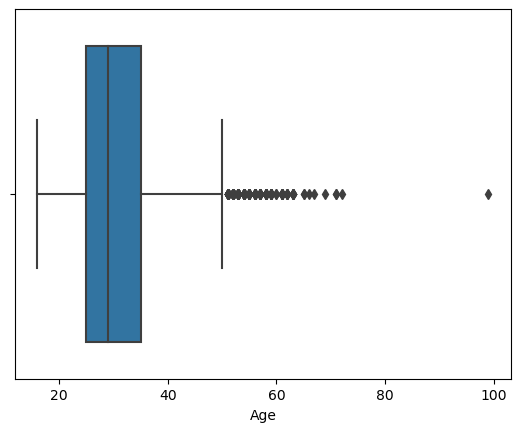

In [24]:
sns.boxplot(x=df["Age"])
plt.show()

Finding out the Inter Quartile Range for the column `ConvertedComp`.


In [12]:
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [13]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print('Interquartile range is', IQR)

Interquartile range is 73132.0


Finding out the upper and lower bounds.


In [14]:
Q4 = df['ConvertedComp'].quantile(1)
print('upper bound is', Q1)
print('lower bound is', Q4)

upper bound is 26868.0
lower bound is 2000000.0


Identifying how many outliers are there in the `ConvertedComp` column.


In [15]:
Outliers_below_1stQ = df['ConvertedComp'] < (Q1 - 1.5*IQR).sum()
Outliers_above_3rdQ = df['ConvertedComp'] > (Q3 + 1.5*IQR).sum()

print(Outliers_below_1stQ)
print(Outliers_above_3rdQ)

0        False
1        False
2        False
3        False
4        False
         ...  
11393    False
11394    False
11395    False
11396    False
11397    False
Name: ConvertedComp, Length: 11398, dtype: bool
0        False
1        False
2        False
3         True
4        False
         ...  
11393    False
11394    False
11395    False
11396    False
11397    False
Name: ConvertedComp, Length: 11398, dtype: bool


Creating a new dataframe by removing the outliers from the `ConvertedComp` column.


In [16]:
df['ConvertedComp'].shape

(11398,)

In [18]:
df1 = df[~(Outliers_below_1stQ)]                             
df1.shape

(11398, 85)

In [19]:
df1.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,11398.000000,1.058900e+04,1.058200e+04,11276.000000,8972.000000,11111.000000
mean,12490.392437,7.570477e+05,1.315967e+05,42.064606,4.781071,30.778895
std,7235.461999,9.705598e+06,2.947865e+05,24.672741,4.567060,7.393686
min,4.000000,0.000000e+00,0.000000e+00,3.000000,0.000000,16.000000
25%,6264.250000,2.500000e+04,2.686800e+04,40.000000,2.000000,25.000000
50%,12484.000000,6.500000e+04,5.774500e+04,40.000000,4.000000,29.000000
75%,18784.750000,1.200000e+05,1.000000e+05,43.000000,5.000000,35.000000
max,25142.000000,7.000000e+08,2.000000e+06,1012.000000,99.000000,99.000000


In [20]:
df2 = df[~(Outliers_above_3rdQ)]
df2.shape

(10519, 85)

In [21]:
df2.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,10519.000000,9.710000e+03,9703.000000,10402.000000,8277.000000,10250.000000
mean,12488.961023,7.243963e+05,59883.208389,41.895813,4.809352,30.647298
std,7235.797316,7.184433e+06,43394.336755,24.301665,4.636411,7.352928
min,4.000000,0.000000e+00,0.000000,3.000000,0.000000,16.000000
25%,6257.500000,2.000000e+04,24060.000000,40.000000,2.000000,25.000000
50%,12483.000000,6.300000e+04,52704.000000,40.000000,4.000000,29.000000
75%,18789.500000,1.150000e+05,85574.500000,43.000000,5.000000,34.000000
max,25142.000000,3.900000e+08,209356.000000,1012.000000,99.000000,99.000000


In [23]:
df['ConvertedComp'].median()

57745.0

## Correlation


### Finding correlation


Finding the correlation between `Age` and all other numerical columns.


In [22]:
df.corr()['Age']

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64